In [1]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

(1797, 64)


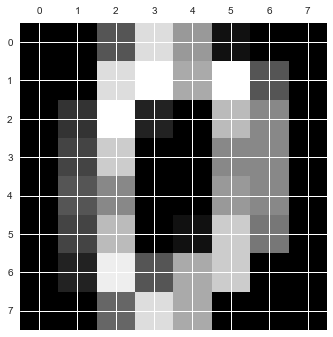

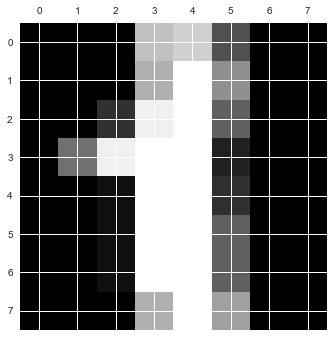

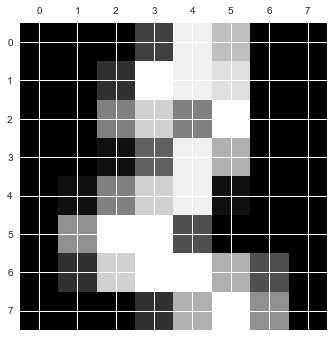

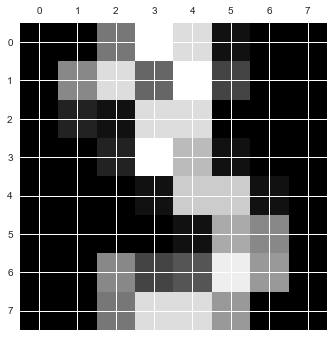

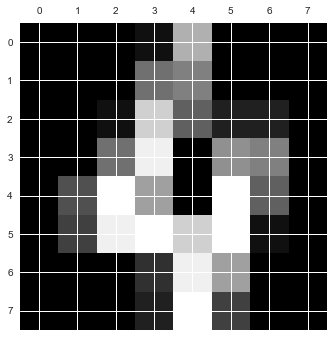

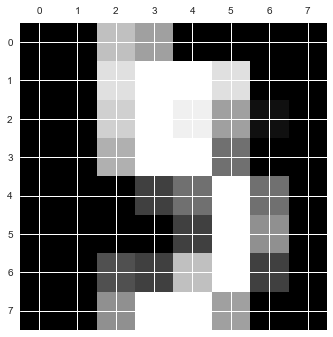

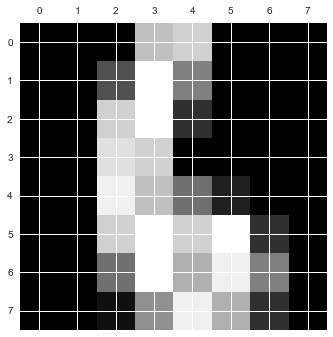

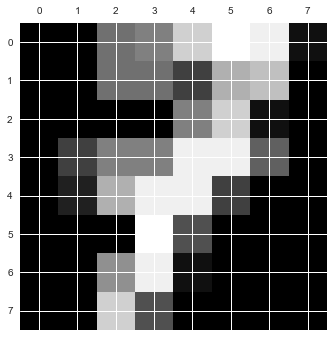

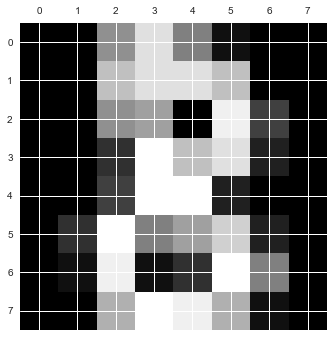

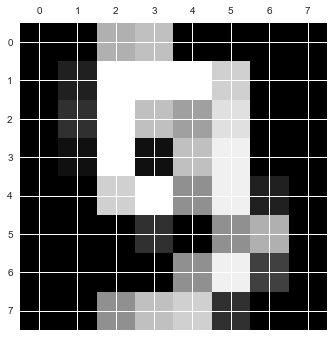

In [3]:
digits = load_digits()
print(digits.data.shape) # There are 10 classes (0 to 9) with alomst 180 images in each class 
                         # The images are 8x8 and hence 64 pixels(dimensions)
plt.gray();
#Displaying what the standard images look like
for i in range(0,10):
    plt.matshow(digits.images[i]) 
    plt.show() 

In [4]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

In [5]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=30).fit_transform(X) 
#Play around with varying the parameters like perplexity, random_state to get different plots

In [6]:
#With the above line, our job is done. But why did we even reduce the dimensions in the first place?
#To visualise it on a graph.

#So, here is a utility function that helps to do a scatter plot of thee transformed data 

def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts



(<matplotlib.figure.Figure at 0xe1a290>,
  <matplotlib.text.Text at 0xdf93730>])

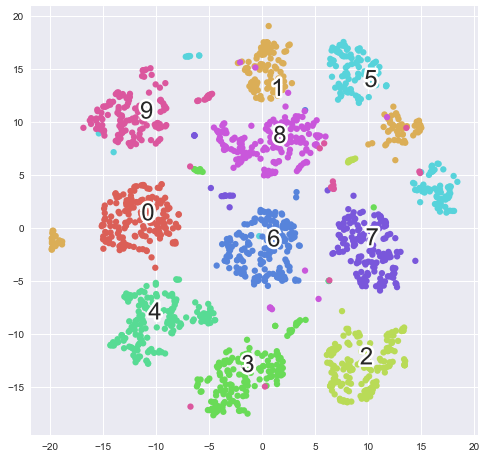

In [7]:
plot(digits_final,Y)